# Assignment 1
- download historical data (candles) for your chosen instrument or instruments, hourly time period or even more frequent,
- calculated the moving average value,
- make a decision on an order (enter the market, exit the market, do nothing), either in accordance with a mean-reverting strategy as discussed - during the class or another strategy, if you feel like doing so, you can use market orders and/or limit/stop orders,
- consider how stop loss / trailing stop loss fits into your strategy and implement it at will,
- make sure your strategy is set up in such a way that it will do some trading during a week, so we can look at the results together.

In [1]:
import time
from services.account import AccountManager
from services.instrument import InstrumentHandler
from strategies.simple_mean_average import SimpleMovingAverage
from config.constants import GRANULARITY_SECONDS

In [2]:
acc_mananger = AccountManager()


In [79]:
# Buy Order
# acc_mananger.createOrder("BUY","BTC_USD", 46103.0, 0.02).json()

# Sell Order
# acc_mananger.createOrder("SELL","BTC_USD", 46103.0, 0.02).json()

In [80]:
def getCurrTime():
    return time.strftime("%Y-%m-%d %H:%M:%S")

# TODO: Create Generic strategy class with shared methods
def startTrading(asset: SimpleMovingAverage):
    while True:
        print(getCurrTime())
        asset.applyStategy()
        time.sleep(GRANULARITY_SECONDS)

In [81]:
btc_usd_sma = SimpleMovingAverage("BTC_USD")
eur_usd_sma = SimpleMovingAverage("EUR_USD")
# Set trading algotithm on threads and add event to stop bot
# startTrading(btc_usd_sma)

BTC_USD Initialized
EUR_USD Initialized
2022-01-19 21:25:30
Position: 0.0 | Percentile Dist: 0.998449127776469 | Ratio: 0.9999597995390084 | Close: 41871.8


KeyboardInterrupt: 

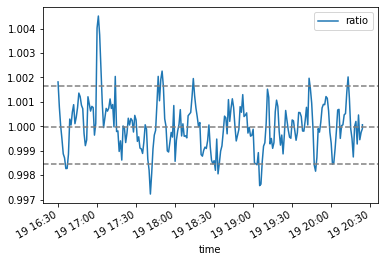

In [70]:
btc_usd_sma.visualizePercentiles()


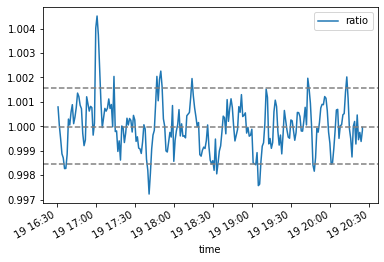

In [82]:
btc_usd_sma.visualizePercentiles()


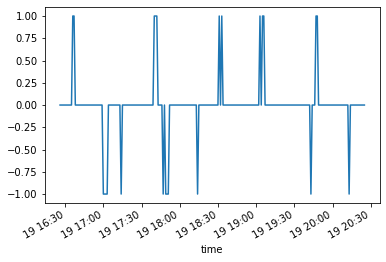

In [83]:
btc_usd_sma.visualizeSignals()


In [84]:
btc_usd_sma = SimpleMovingAverage("BTC_USD")

BTC_USD Initialized


In [3]:
btc_usd_sma.data

NameError: name 'btc_usd_sma' is not defined

In [4]:
btc_usd_sma.plotCandles()



NameError: name 'btc_usd_sma' is not defined

In [ ]:
import backtesting

In [5]:
backtesting.Strategy()

NameError: name 'backtesting' is not defined

In [6]:
from backtesting import Strategy
import numpy as np

/Users/michal/Library/Python/3.8/lib/python/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [21]:
class MomentumStrategy(InstrumentHandler):
    def __init__(self, instrument, window_length = 14, **kwargs):
        super(MomentumStrategy, self).__init__(instrument, **kwargs)
        self.window_length = window_length # default value set on 14
        self.__count_returns()
        self.__define_movement()
        self.__calculate_rsi()
        self.__count_total()

    def __count_returns(self):
        self.data['return'] = self.data['c'].pct_change() 

    def __define_movement(self):
        self.data['movement'] = self.data['c'] - self.data['c'].shift(1)
        self.data['up'] = np.where((self.data['movement'] > 0) ,self.data['movement'],0)
        self.data['down'] = np.where((self.data['movement'] < 0) ,self.data['movement'],0)

    def __calculate_rsi(self):
        #calculate moving average of the last 14 days  gains
        up = self.data['up'].rolling(self.window_length).mean()
        #calculate moving average of the last 14 days  losses
        down = self.data['down'].abs().rolling(self.window_length).mean()

        RS = up / down
        self.data['rsi'] = 100.0 - (100.0 / (1.0 + RS))

    def __count_total(self):
        self.data['long'] = np.where((self.data['rsi'] < 30),1,np.nan)
        self.data['long'] = np.where((self.data['rsi'] > 70),0,self.data['long'])

        self.data['long'].ffill(inplace=True)

        self.data['gain_loss'] = self.data['long'].shift(1) * self.data['return']

        self.data['total'] =  self.data['gain_loss'].cumsum()
    

In [22]:
eur_usd_momentum = MomentumStrategy("BTC_USD")

BTC_USD Initialized


In [23]:
eur_usd_momentum.data

,o,h,l,c,return,movement,up,down,rsi,long,gain_loss,total
time,,,,,,,,,,,,
2021-02-14 22:00:00+00:00,49086.8,49138.1,45921.6,48211.7,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2021-02-15 22:00:00+00:00,48271.5,50604.0,47054.3,48595.9,0.007969,384.2,384.2,0.0,NaN,NaN,NaN,NaN
2021-02-16 22:00:00+00:00,48575.0,52664.3,48543.2,52411.1,0.078509,3815.2,3815.2,0.0,NaN,NaN,NaN,NaN
2021-02-17 22:00:00+00:00,52404.6,52568.6,50871.6,52041.4,-0.007054,-369.7,0.0,-369.7,NaN,NaN,NaN,NaN
2021-02-18 22:00:00+00:00,52053.7,56348.2,50766.3,55642.2,0.069191,3600.8,3600.8,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12 22:00:00+00:00,43797.0,44456.9,42329.6,42829.0,-0.021749,-952.2,0.0,-952.2,18.073209,1.0,-0.021749,-0.115735
2022-01-13 22:00:00+00:00,42856.8,43433.6,41770.1,43347.3,0.012102,518.3,518.3,0.0,21.324695,1.0,0.012102,-0.103633
2022-01-16 22:00:00+00:00,43372.6,43575.8,41622.0,41737.8,-0.037130,-1609.5,0.0,-1609.5,24.670898,1.0,-0.037130,-0.140763
